In [2]:
def shortcct(row_number):
    from openpyxl import Workbook
    import openpyxl
    path = r"C:\Users\user122\Desktop\ANDcircuits.xlsx"
    wb_obj = openpyxl.load_workbook(path)
    sheet_obj = wb_obj.active
    cell_obj = sheet_obj.cell(row = 5, column = 1)
    argv=cell_obj.value
    argv=argv.split('\n')
    a=[]
    for n in argv:
        n=n.split()
        a.extend([n])
    

    for i in range (len(a)):
        print('\n')
        print("Shor circuiting the device" + str(i+1), "we get",'\n')
        nets=[]
        for n in argv:
            n=n.split()
            nets.extend([n])
        short_ccted=nets[i]
        nets.remove(short_ccted)
        if short_ccted[-1]=='PMOS' or short_ccted[-1]=='NMOS':
            if short_ccted[1]=='N0001':
                replacement=short_ccted[3]
            elif short_ccted[3]=='N0001':
                replacement=short_ccted[1]
            else:
                replacement=''
        else:
            if short_ccted[1]=='N0001':
                replacement=short_ccted[2]
            elif short_ccted[2]=='N0001':
                replacement=short_ccted[1]
            else:
                replacement=''
        new_nets=[]
        for n in nets:
            lst=[]
            for i in n:
                if i=='N0001' and replacement!='':
                    lst.append(replacement)
                else:
                    lst.append(i)
            new_nets.extend([lst])
        print(new_nets)
        import matplotlib.pyplot as plt
        import networkx as nx
        edges=[]
        for i in new_nets:
                if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                    edges.extend([[i[1], i[3]]])
                else:
                    edges.extend([[i[1], i[2]]])
        G = nx.Graph()
        G.add_edges_from(edges)
        pos = nx.circular_layout(G)
        plt.figure()
        nx.draw(
            G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='pink', alpha=0.9,
            labels={node: node for node in G.nodes()}
        )
        count=1
        edge_labels={}
        for i in new_nets:
                if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                    edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                    edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                    count+=1
                else:
                    edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                    edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

        nx.draw_networkx_edge_labels(
            G, pos, edge_labels,
            font_color='red'
        )
        plt.axis('off')
        plt.show()








Shor circuiting the device1 we get 

[['M0002', 'VDD00', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0004', 'IN002', 'N0001', 'MR']]


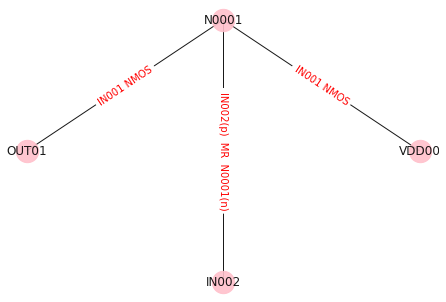



Shor circuiting the device2 we get 

[['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0003', 'OUT01', 'IN001', 'VDD00', 'GND00', 'NMOS'], ['M0004', 'IN002', 'VDD00', 'MR']]


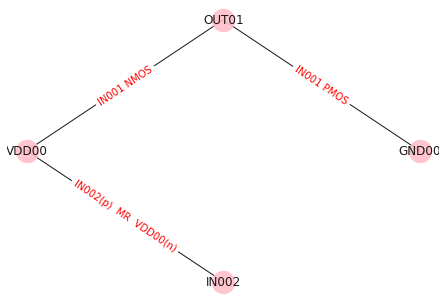



Shor circuiting the device3 we get 

[['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'VDD00', 'IN001', 'OUT01', 'GND00', 'NMOS'], ['M0004', 'IN002', 'OUT01', 'MR']]


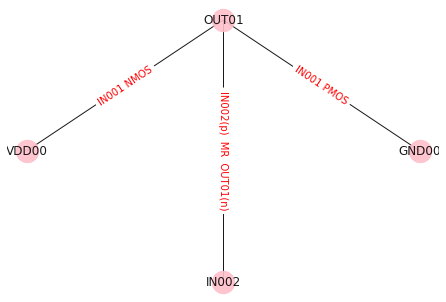



Shor circuiting the device4 we get 

[['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'VDD00', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0003', 'OUT01', 'IN001', 'IN002', 'GND00', 'NMOS']]


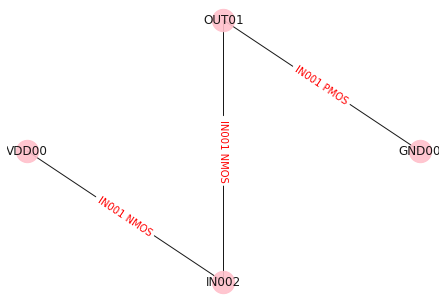

In [4]:
shortcct(5)



Shor circuiting the device1 we get 

[['M0002', 'VDD00', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0004', 'IN002', 'N0001', 'MR']]


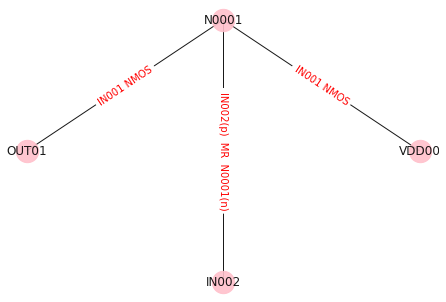



Shor circuiting the device2 we get 

[['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0003', 'OUT01', 'IN001', 'VDD00', 'GND00', 'NMOS'], ['M0004', 'IN002', 'VDD00', 'MR']]


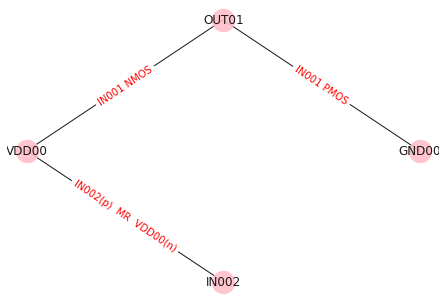



Shor circuiting the device3 we get 

[['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'VDD00', 'IN001', 'OUT01', 'GND00', 'NMOS'], ['M0004', 'IN002', 'OUT01', 'MR']]


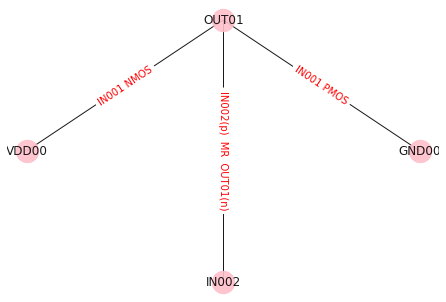



Shor circuiting the device4 we get 

[['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'VDD00', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0003', 'OUT01', 'IN001', 'IN002', 'GND00', 'NMOS']]


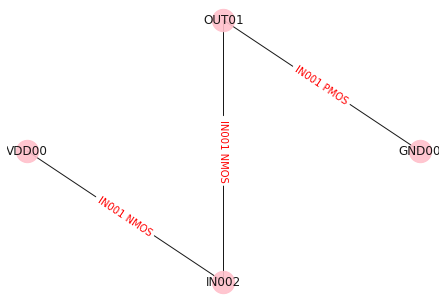

In [3]:
shortcct(71)